## Proje-3 Araç Yakıt Tüketimi *** Veri seti ya da kod hatalı ***

### Kütüphanelerin yüklenmesi

In [1]:
# Kütüphaneler
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# istatistik 
from scipy import stats
from scipy.stats import norm, skew

# Machine Learning
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.base import clone

# uyarıları kapatalım.
import warnings
warnings.filterwarnings("ignore")

### Verileri Yükleyelim

In [2]:
# veriyi aktaralım
sutun_isimleri = ["hedef", "silindir", "motor_hacmi", "beygir_gucu", "agirlik", "ivme", "model_yil", "mensei"]
veri = pd.read_csv("/DATA/datasets/auto-mpg.csv", names = sutun_isimleri, na_values = "?", sep = ";")
veri.head()

,hedef,silindir,motor_hacmi,beygir_gucu,agirlik,ivme,model_yil,mensei
0,180,8,307,130.0,3504.0,120,70,chevrolet chevelle malibu
1,150,8,350,165.0,3693.0,115,70,buick skylark 320
2,180,8,318,150.0,3436.0,110,70,plymouth satellite
3,160,8,304,150.0,3433.0,120,70,amc rebel sst
4,170,8,302,140.0,3449.0,105,70,ford torino


### Verinin Şekli

In [3]:
# veri şekli
print("veri şekli : ", veri.shape)

veri şekli :  (398, 8)


In [4]:
# veri bilgisi
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hedef        398 non-null    int64  
 1   silindir     398 non-null    int64  
 2   motor_hacmi  398 non-null    int64  
 3   beygir_gucu  392 non-null    float64
 4   agirlik      392 non-null    float64
 5   ivme         398 non-null    int64  
 6   model_yil    398 non-null    int64  
 7   mensei       398 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 25.0+ KB


### Temel İstatistiksel Bilgiler

In [5]:
# temel istatistiksel bilgi
veri.describe()

,hedef,silindir,motor_hacmi,beygir_gucu,agirlik,ivme,model_yil
count,398.000000,398.000000,398.000000,392.000000,392.000000,398.000000,398.000000
mean,235.145729,5.454774,390.781407,104.469388,2977.584184,192.947236,77.444724
std,78.159843,1.701004,304.540915,38.491160,849.402560,295.617800,12.654116
min,90.000000,3.000000,100.000000,46.000000,1613.000000,80.000000,70.000000
25%,175.000000,4.000000,146.000000,75.000000,2225.250000,139.000000,73.000000
50%,230.000000,4.000000,260.000000,93.500000,2803.500000,155.000000,76.000000
75%,290.000000,8.000000,454.750000,126.000000,3614.750000,173.000000,79.000000
max,466.000000,8.000000,980.000000,230.000000,5140.000000,3035.000000,205.000000


### Kayıp veriler var mı?

In [6]:
# kayıp veri
print(veri.isna().sum())

hedef          0
silindir       0
motor_hacmi    0
beygir_gucu    6
agirlik        6
ivme           0
model_yil      0
mensei         0
dtype: int64


### Eksikleri ortalama ile dolduralım

In [7]:
# beygir gücü eksiklerini ortalama ile doldur.
veri["beygir_gucu"] = veri["beygir_gucu"].fillna(veri["beygir_gucu"].mean())
# agirlik eksiklerini ortalama ile doldur.
veri["agirlik"] = veri["agirlik"].fillna(veri["agirlik"].mean())
print(veri.isna().sum())

hedef          0
silindir       0
motor_hacmi    0
beygir_gucu    0
agirlik        0
ivme           0
model_yil      0
mensei         0
dtype: int64


### Beygir gücünün ortalamasının etkisi

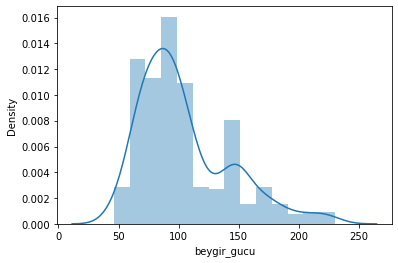

In [8]:
# beygir gücü ortalamasının etkisi
sns.distplot(veri.beygir_gucu)
plt.show()

### Veri Özellikleri Arasındaki İlişki

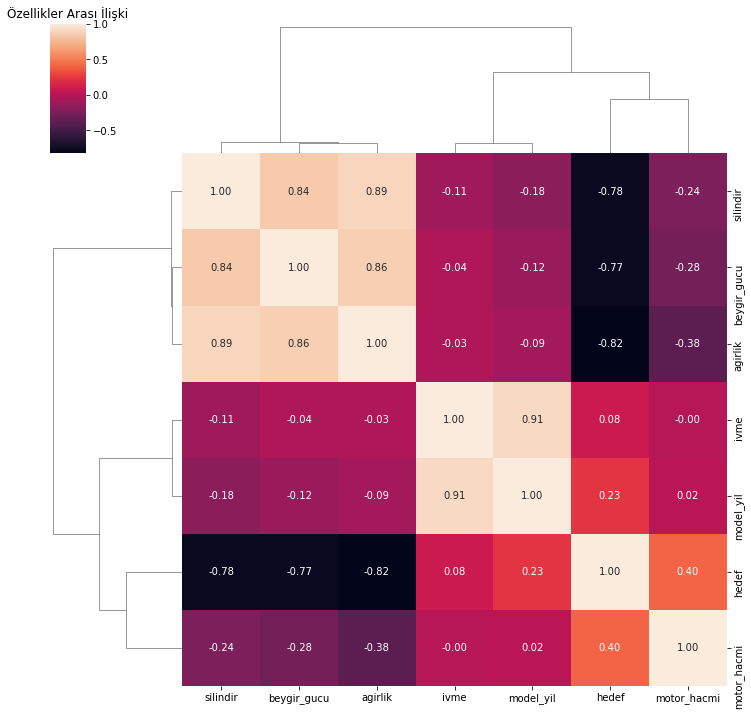

In [9]:
# veri özellikleri arası ilişki
corr_matrix = veri.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Özellikler Arası İlişki")
plt.show()

### Hedef ile ilişkisi 0.75 den büyük olan özellikler

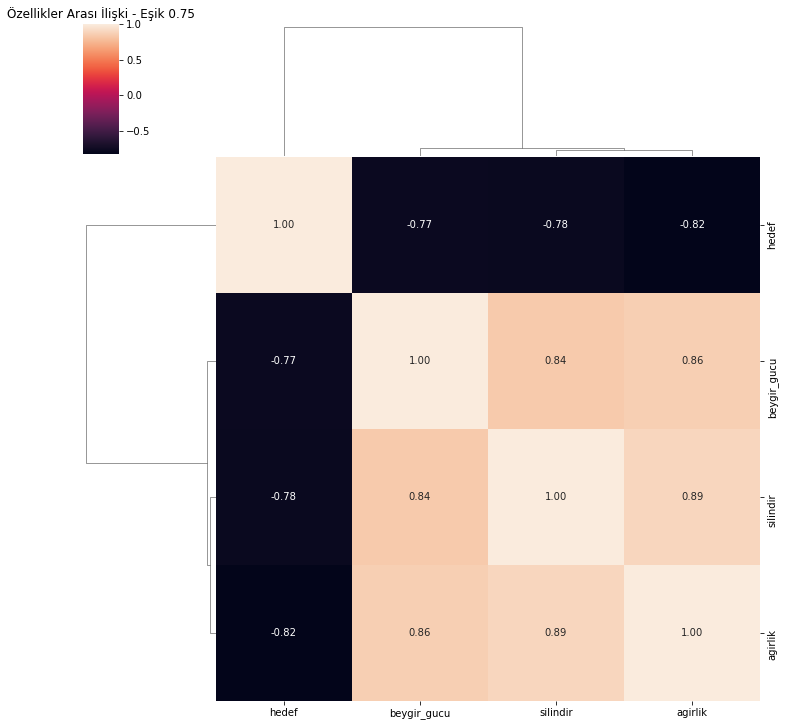

In [10]:
# hedef ile arasındaki ilişki 0.75 den büyük olan özellikler
threshold = 0.75
filtre = np.abs(corr_matrix["hedef"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(veri[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Özellikler Arası İlişki - Eşik 0.75")
plt.show()

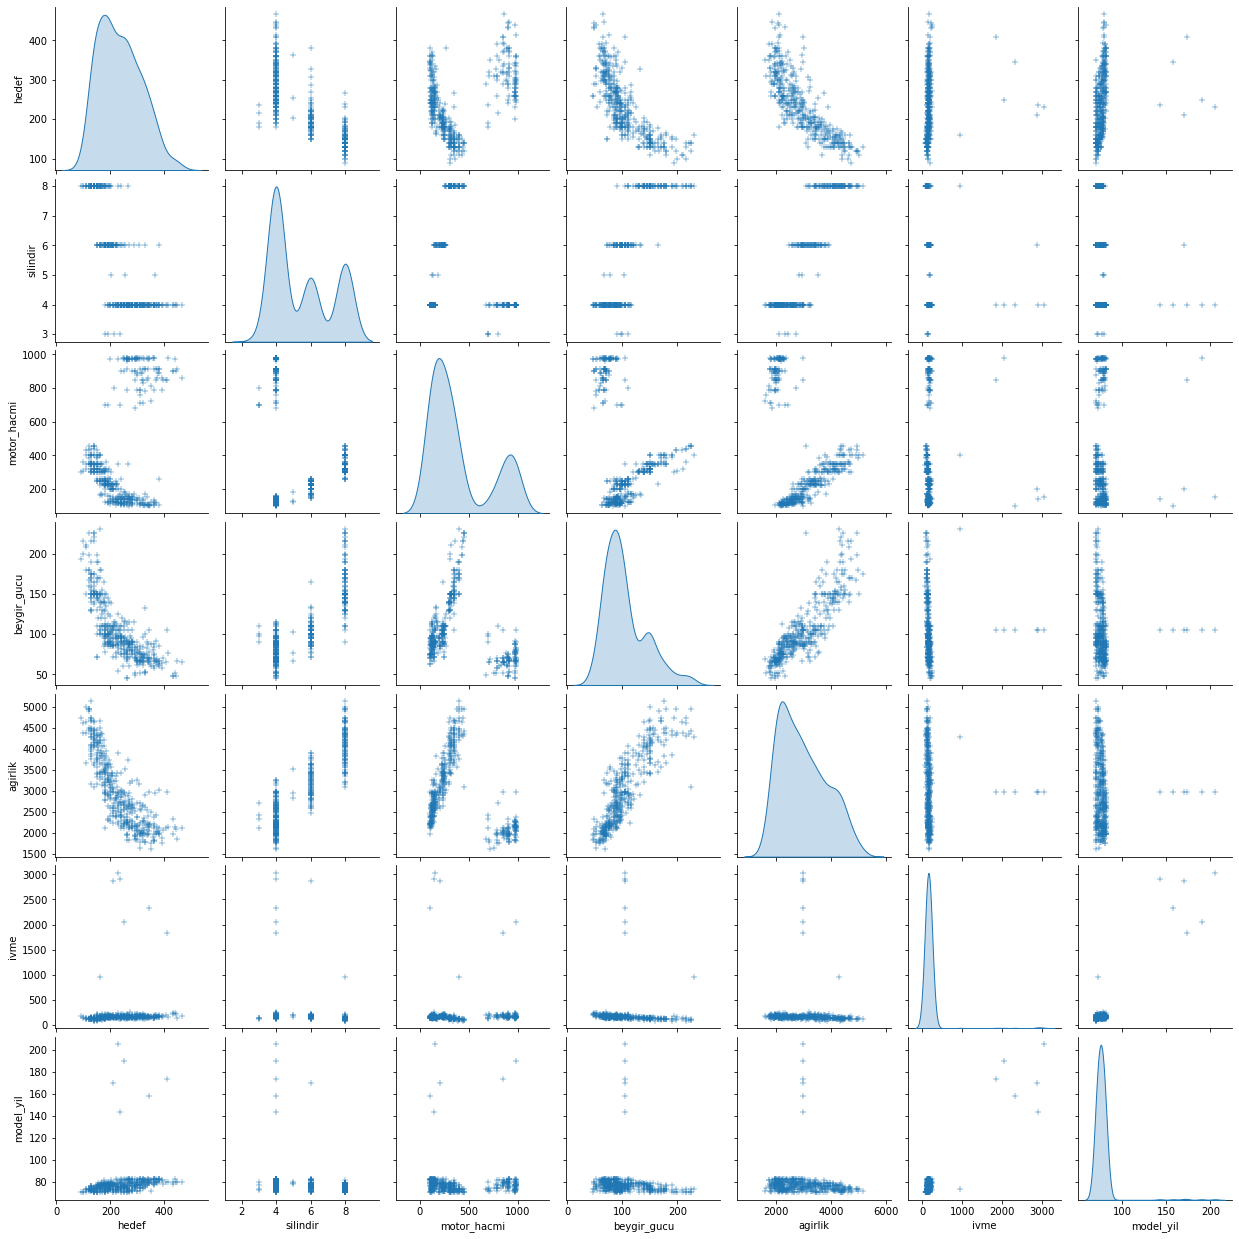

In [11]:
sns.pairplot(veri, diag_kind = "kde", markers = "+")
plt.show()

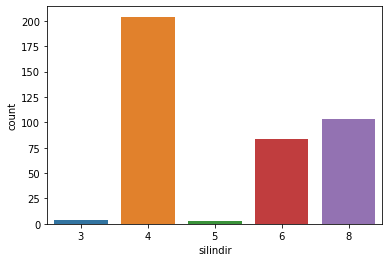

4    204
8    103
6     84
3      4
5      3
Name: silindir, dtype: int64


In [12]:
plt.figure()
sns.countplot(veri["silindir"])
plt.show()
print(veri["silindir"].value_counts())

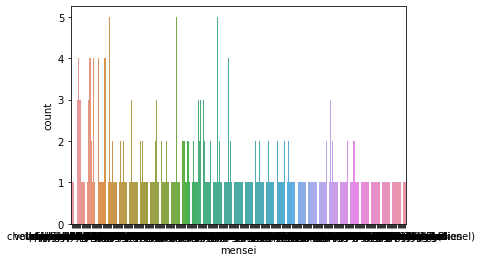

toyota corolla         5
amc matador            5
ford pinto             5
chevrolet chevette     4
amc hornet             4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s,10             1
Name: mensei, Length: 303, dtype: int64


In [13]:
plt.figure()
sns.countplot(veri["mensei"])
plt.show()
print(veri["mensei"].value_counts())

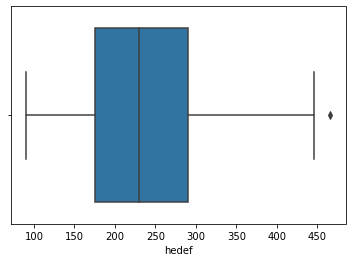

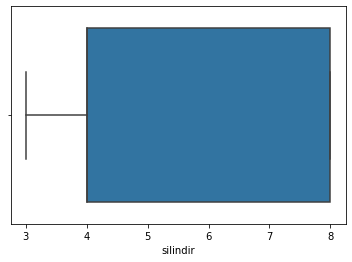

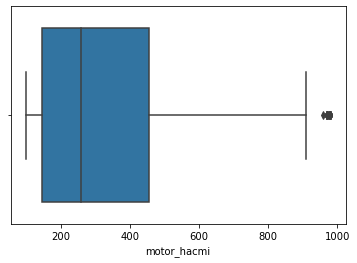

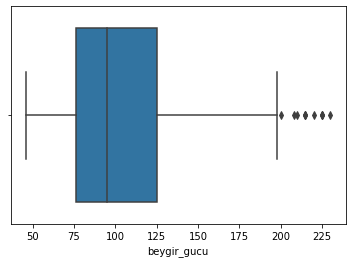

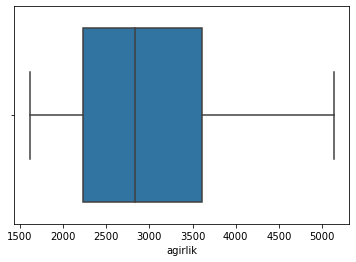

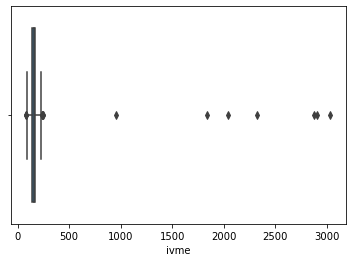

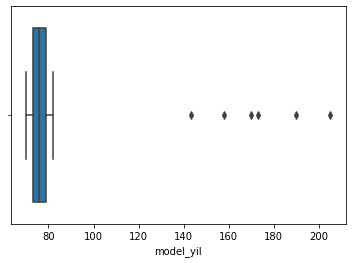

TypeError: Horizontal orientation requires numeric `x` variable.

<Figure size 432x288 with 0 Axes>

In [14]:
for c in veri.columns:
    plt.figure()
    sns.boxplot(x = c, data = veri, orient = "v")
    plt.show()

### Aykırı Değerlerin bulunup, çıkarılması

In [15]:
tanim = veri.describe()
tanim

,hedef,silindir,motor_hacmi,beygir_gucu,agirlik,ivme,model_yil
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,235.145729,5.454774,390.781407,104.469388,2977.584184,192.947236,77.444724
std,78.159843,1.701004,304.540915,38.199187,842.959464,295.617800,12.654116
min,90.000000,3.000000,100.000000,46.000000,1613.000000,80.000000,70.000000
25%,175.000000,4.000000,146.000000,76.000000,2228.500000,139.000000,73.000000
50%,230.000000,4.000000,260.000000,95.000000,2831.500000,155.000000,76.000000
75%,290.000000,8.000000,454.750000,125.000000,3608.000000,173.000000,79.000000
max,466.000000,8.000000,980.000000,230.000000,5140.000000,3035.000000,205.000000


In [16]:
# beygir gücü
thr = 2
horsepower_desc = tanim["beygir_gucu"]
q3_hp = horsepower_desc[6]
q1_hp = horsepower_desc[4]
IQR_hp = q3_hp - q1_hp
top_limit_hp = q3_hp + thr * IQR_hp
bottoom_limit_hp = q1_hp - thr * IQR_hp
filter_hp_bottom = bottoom_limit_hp < veri["beygir_gucu"]
filter_hp_top = veri["beygir_gucu"] < top_limit_hp
filter_hp = filter_hp_bottom & filter_hp_top
veri = veri[filter_hp]

In [17]:
# ivme
acceleration_desc = tanim["ivme"]
q3_acc = acceleration_desc[6]
q1_acc = acceleration_desc[4]
IQR_acc = q3_acc -q1_acc
top_limit_acc = q3_acc + thr * IQR_acc
bottom_limit_acc = q1_acc - thr * IQR_acc
filter_acc_bottom = bottom_limit_acc < veri["ivme"]
filter_acc_top = veri["ivme"] < top_limit_acc
filter_acc = filter_acc_bottom & filter_acc_top
veri = veri[filter_acc]

### Öz nitelikler

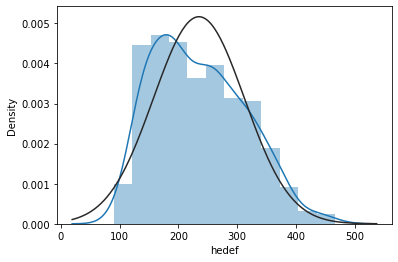

In [18]:
# hedef değişken dağılımı
plt.figure()
sns.distplot(veri.hedef, fit = norm)
plt.show()

### mu ve sigma değerleri

In [19]:
# mu sigma
(mu, sigma) = norm.fit(veri["hedef"])
print("mu : {}, sigma = {}".format(mu, sigma))

mu : 234.8082901554404, sigma = 77.22025918554436


### Q-Q Grafiği

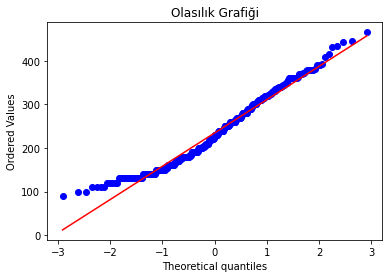

In [20]:
# qq plot
plt.figure()
stats.probplot(veri["hedef"], plot = plt)
plt.title("Olasılık Grafiği")
plt.show()

### Çarpıklığı azaltalım

In [21]:
# log1p ile çarpıklığı azaltalım
veri["hedef"] = np.log1p(veri["hedef"])

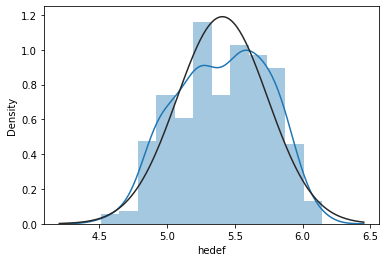

In [22]:
plt.figure()
sns.distplot(veri.hedef, fit = norm)
plt.show()

### Çarpıklık düzeldikten sonra mu ve sigma değerleri

In [23]:
# Çarpıklığı düzeltilen hedef değişkenin mu ve sigma değeri
(mu, sigma) = norm.fit(veri["hedef"])
print("mu : {}, sigma = {}".format(mu, sigma))

mu : 5.408156575049726, sigma = 0.33520831366724646


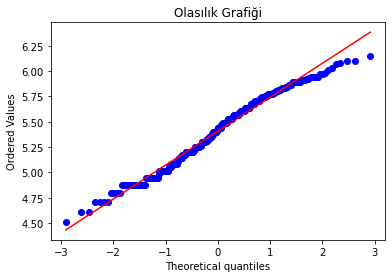

In [24]:
# qq plot
plt.figure()
stats.probplot(veri["hedef"], plot = plt)
plt.title("Olasılık Grafiği")
plt.show()

### Diğer verilerin çarpıklıklarının kontrolü

In [25]:
# veri seti içindeki diğer verilerin çarpıklıkları
carpik_ozellikler = veri.apply(lambda x: skew(x.dropna())).sort_values(ascending = True)
carpiklik = pd.DataFrame(carpik_ozellikler, columns = ["çarpık"])
carpiklik

TypeError: unsupported operand type(s) for /: 'str' and 'int'

### Öznitelik Mühendisliği Kodlama

In [26]:
# Öznitelik işlemleri
veri["silindir"] = veri["silindir"].astype(str)
veri["mensei"] = veri["mensei"].astype(str)
veri = pd.get_dummies(veri)

#### Ön İşlem

In [27]:
# bölünme x-y
x = veri.drop(["hedef"], axis = 1)
y = veri.hedef

#### Eğitim test bölünmesi

In [28]:
# eğitim test bölünmesi
X_egitim, X_test, Y_egitim, Y_test = train_test_split(x, y, test_size = 0.9,)

#### Standardizasyon

In [29]:
# standardizasyon
scaler = RobustScaler()
X_egitim = scaler.fit_transform(X_egitim)
X_test = scaler.transform(X_test)

#### Doğrusl Regresyon

In [30]:
# doğrusal regresyon
lr = LinearRegression()
lr.fit(X_egitim, Y_egitim)
print("Doğrusal Regresyon Katsayıları : ", lr.coef_)
y_predicted_dummy = lr.predict(X_test)
mse_dogrusal = mean_squared_error(Y_test, y_predicted_dummy)
print("Doğrusal Regresyon Ortalama Kare Hatası : ", mse_dogrusal)

Doğrusal Regresyon Katsayıları :  [-4.93900699e-03 -7.38418408e-02 -1.53938152e-01 -3.28411953e-02
  9.82432034e-02 -8.32667268e-17  1.05705834e-01 -4.06261812e-02
 -2.13801731e-02 -4.36994794e-02  1.38777878e-17  0.00000000e+00
  6.93889390e-18  1.38777878e-16 -2.77555756e-17  4.16333634e-17
 -5.59804514e-03  0.00000000e+00  8.67361738e-18  7.37257477e-18
  5.55111512e-17 -4.85722573e-17 -1.07927449e-01  1.04083409e-17
 -2.08166817e-17  4.16333634e-17  2.08166817e-17  0.00000000e+00
 -4.06261812e-02  1.38777878e-17  0.00000000e+00 -1.11022302e-16
  1.38777878e-17 -6.93889390e-18  0.00000000e+00  0.00000000e+00
 -6.93889390e-18  0.00000000e+00  1.12203579e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  7.61792103e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  6.0307

#### Ridge Regresyon

ridge Katsayıları :  [ 0.00829233 -0.09255533 -0.12745375 -0.0330095   0.11888683  0.
  0.09133416 -0.03360019 -0.0233208  -0.03441316  0.          0.
  0.          0.          0.          0.          0.00172914  0.
  0.          0.          0.          0.         -0.08830021  0.
  0.          0.          0.          0.         -0.03360019  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.06740138  0.          0.          0.
  0.          0.05073582  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.01857865
  0.          0.          0.         -0.09702103  0.          0.
  0.          0.          0.          0.09007175  0.          0.
  0.          0.          0.          0.         -0.03154874  0.
  0.         -0.08472073  0.          0.          0.          0.
  0.          0.          0.          0.          0.         

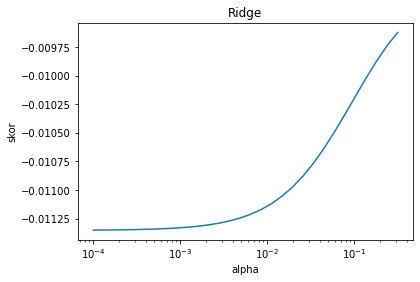

In [31]:
# ridge regresyon
ridge = Ridge(random_state = 42, max_iter = 10000)
alphas = np.logspace(-4, -0.5, 30)
tuned_parameters = [{"alpha" : alphas}]
n_folds = 5
clf = GridSearchCV(ridge, tuned_parameters, cv = n_folds, scoring = "neg_mean_squared_error")
clf.fit(X_egitim, Y_egitim)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]
print("ridge Katsayıları : ", clf.best_estimator_.coef_)
ridge = clf.best_estimator_
print("Ridge En iyi tahmin : ", ridge)
y_predicted_dummy = clf.predict(X_test)
mse_ridge = mean_squared_error(Y_test, y_predicted_dummy)
print("Ridge Ortalama Kare Hata : ", mse_ridge)
print(80*"-")
plt.figure()
plt.semilogx(alphas, scores)
plt.xlabel("alpha")
plt.ylabel("skor")
plt.title("Ridge")
plt.show()

#### Lasso Regresyon

Lasso Katsayıları :  [ 0.00806547 -0.08629103 -0.15908438 -0.02677537  0.12192763  0.
  0.08891921 -0.         -0.         -0.          0.          0.
  0.          0.          0.          0.         -0.          0.
  0.          0.          0.          0.         -0.          0.
  0.          0.          0.          0.         -0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.          0.
  0.         -0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.

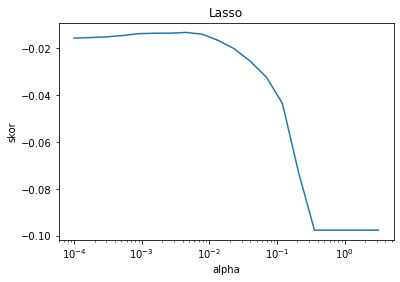

In [32]:
# lasso
lasso = Lasso(random_state = 42, max_iter = 10000)
alphas = np.logspace(-4, 0.5, 20)
tuned_parameters = [{"alpha" : alphas}]
n_folds = 5
clf = GridSearchCV(lasso, tuned_parameters, cv = n_folds, scoring = "neg_mean_squared_error")
clf.fit(X_egitim, Y_egitim)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]
print("Lasso Katsayıları : ", clf.best_estimator_.coef_)
lasso = clf.best_estimator_
print("Lasso en iyi tahminleyici : ", lasso)
y_predicted_dummy = clf.predict(X_test)
mse_lasso = mean_squared_error(Y_test, y_predicted_dummy)
print("Lasso ortalama kare hata : ",mse_lasso)
print(30*"-")
plt.figure()
plt.semilogx(alphas, scores)
plt.xlabel("alpha")
plt.ylabel("skor")
plt.title("Lasso")
plt.show()

#### Elastik ağ

In [33]:
# elastik ağ
parametersGrid = {"alpha" : alphas, "l1_Ratio" : np.arange(0.0, 1.0, 0.05)}
# parametersGrid = {"ridge__alpha" : alphas, "l1 Ratio" : np.logspace(0, 1, 0)}
eNet = ElasticNet(random_state = 42, max_iter = 10000)
clf = GridSearchCV(eNet, parametersGrid, cv = n_folds, scoring = "neg_mean_squared_error")
clf.fit(X_egitim, Y_egitim)
print("Elastik Ağ katsayıları : ", clf.best_estimator_.coef_)
print("Elastik Ağ en iyi thminleyici : ", clf.best_estimator_)
y_predicted_dummy = clf.predict(X_test)
mse_elastik = mean_squared_error(Y_test, y_predicted_dummy)
print("Elastik ağ ortalam kare hata : ", mse_elastik)

ValueError: Invalid parameter l1_Ratio for estimator ElasticNet(alpha=0.0001, max_iter=10000, random_state=42). Check the list of available parameters with `estimator.get_params().keys()`.

In [34]:
langs = ["Doğrusal", "ridge", "Lasso", "Elastik Ağ"]
students = [mse_dogrusal, mse_ridge, mse_lasso, mse_elastik]
plt.bar(langs, students)
plt.title("Ortalama Kare Hatası")
plt.show()

NameError: name 'mse_elastik' is not defined